In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.13.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/folhas_atv04/folhaszip.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

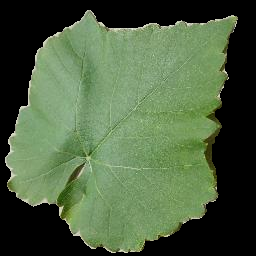

In [6]:
tf.keras.preprocessing.image.load_img('/content/folhaszip/training_set/folha_uva/uva_0.png')

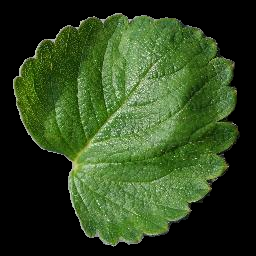

In [7]:
tf.keras.preprocessing.image.load_img('/content/folhaszip/training_set/folha_morango/morango_0.png')

In [8]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)

In [9]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/folhaszip/training_set',
                                                              target_size = (64, 64),
                                                              batch_size = 8,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

Found 240 images belonging to 2 classes.


In [10]:
dataset_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [11]:
dataset_treinamento.class_indices

{'folha_morango': 0, 'folha_uva': 1}

In [12]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/folhaszip/test_set',
                                                  target_size = (64, 64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 120 images belonging to 2 classes.


In [14]:
rede_neural = Sequential()
rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 577, activation='relu'))
rede_neural.add(Dense(units = 577, activation='relu'))
rede_neural.add(Dense(units = 2, activation='softmax'))

rede_neural.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

In [15]:
rede_neural.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
historico = rede_neural.fit(dataset_treinamento, epochs=50)

Epoch 1/50
30/30 [==============================] - 12s 39ms/step - loss: 0.5989 - accuracy: 0.7125
Epoch 2/50
30/30 [==============================] - 1s 32ms/step - loss: 0.3695 - accuracy: 0.8500
Epoch 3/50
30/30 [==============================] - 1s 24ms/step - loss: 0.2010 - accuracy: 0.9208
Epoch 4/50
30/30 [==============================] - 1s 36ms/step - loss: 0.0982 - accuracy: 0.9583
Epoch 5/50
30/30 [==============================] - 1s 37ms/step - loss: 0.0716 - accuracy: 0.9792
Epoch 6/50
30/30 [==============================] - 1s 38ms/step - loss: 0.0421 - accuracy: 0.9833
Epoch 7/50
30/30 [==============================] - 1s 33ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 8/50
30/30 [==============================] - 1s 25ms/step - loss: 0.1224 - accuracy: 0.9625
Epoch 9/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0876 - accuracy: 0.9667
Epoch 10/50
30/30 [==============================] - 1s 24ms/step - loss: 0.0587 - accuracy: 0.9792
Epoch 11

In [17]:
previsoes = rede_neural.predict(dataset_teste)
previsoes

120/120 [==============================] - 1s 3ms/step


array([[1.0000000e+00, 3.5169402e-11],
       [1.0000000e+00, 3.2461012e-10],
       [1.0000000e+00, 7.9375778e-10],
       [1.0000000e+00, 9.4630774e-09],
       [1.0000000e+00, 1.4238534e-15],
       [1.0000000e+00, 3.1834997e-09],
       [1.0000000e+00, 6.0241456e-09],
       [1.0000000e+00, 1.2175655e-08],
       [1.0000000e+00, 2.8627655e-08],
       [1.0000000e+00, 5.4460242e-10],
       [1.0000000e+00, 3.6613492e-09],
       [1.0000000e+00, 2.5998209e-11],
       [1.0000000e+00, 3.1213016e-08],
       [1.0000000e+00, 1.5285176e-13],
       [1.0000000e+00, 2.1999901e-10],
       [1.0000000e+00, 4.1335602e-09],
       [1.0000000e+00, 4.9643872e-10],
       [1.0000000e+00, 1.7765856e-12],
       [1.0000000e+00, 3.6294090e-08],
       [1.0000000e+00, 1.4248812e-10],
       [1.0000000e+00, 7.7442158e-10],
       [1.0000000e+00, 7.0900894e-12],
       [1.0000000e+00, 3.8759645e-13],
       [9.9999940e-01, 5.3807440e-07],
       [1.0000000e+00, 2.5620906e-13],
       [1.0000000e+00, 2.

In [19]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [20]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.9666666666666667

In [24]:
dataset_teste.class_indices

{'folha_morango': 0, 'folha_uva': 1}

<Axes: >

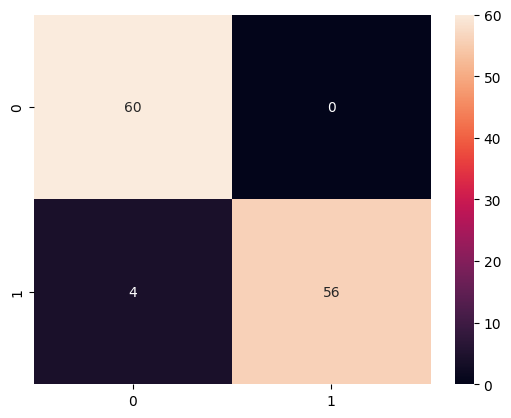

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True)

Todas as imagens das folhas de morango foram classificadas corretamente

56 imagens das folhas de uva foram classificadas corretamente, porém 4 imagens foram classificadas como se fossem folhas de morango


In [25]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.93      0.97        60

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

